## Import modules, set plot styles & some color functions

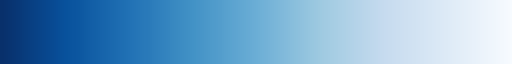

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def img2cmap(fname, name=None,reversed=False ):

    # Opening and extracting the image
    img = Image.open("blue.png")
    arr_img = np.array(img)[0]
    arr_img= arr_img.astype(np.float64)/255.0

    # Creating the custom colormap from the uploaded gradient
    cmap =  LinearSegmentedColormap.from_list(
        name+"_R" if reversed else name,
        np.flip(arr_img,0) if reversed else arr_img
    )
    return cmap
    
custom_cmap = img2cmap("Blue.png","Blue",True)
custom_cmap

## Uploading the raw file and editing the file to make it more readable

In [2]:
X_COLS = ['Day1_H2O2', 'Day2_H2O2', 'Day3_H2O2', 'Day1_Lysozyme',
       'Day2_Lysozyme', 'Day3_Lysozyme', 'Day1_Sonication', 'Day2_Sonication',
       'Day3_Sonication']
X_COLS_H = ['Day 1 H2O2\n(µL)', 'Day 2 H2O2\n(µL)',
       'Day 3 H2O2\n(µL)', 'Day 1 Lysozyme\n(mg mL –1)',
       'Day 2 Lysozyme\n(mg mL –1)', 'Day 3 Lysozyme\n(mg mL –1)',
       'Day 1 Sonication\n(minutes)', 'Day 2 Sonication\n(minutes)',
       'Day 3 Sonication\n(minutes)']
Y_COLS = ['Average_Conc', 'StDev_Conc', 'Average_Fold', 'StDev_Fold']

Y_COLS_H = ['Average Conc.\n(particlesmL –1)','St. Dev. Conc.\n(particlesmL –1)','Particle\nFold Increase','St. Dev %']

df = pd.read_excel("Bio_ML_summary-07-19-24.xlsx", skiprows=4, usecols='B:AD',na_values=['na'])

# Renaming X columns
df.rename(columns={h:c for h, c in zip(X_COLS_H,X_COLS)},inplace = True)

# Filtering
df = df[~df['Day3_Sonication'].isin(['Control', 'MRS'])].reset_index(drop=True)

# Converting the data to numbers
for d in df.columns:
    df[d] = pd.to_numeric(df[d], errors ="coerce")
    
# Filling in Nan
df=df.fillna(0.0)

# Renaming X columns
df.rename(columns={h:c for h, c in zip(Y_COLS_H,Y_COLS)},inplace = True)

# df['StDev_Fold'] = df['StDev_Fold'] / 100.0 * df['Average_Fold']

#Creating a new data frame with just the relevant data
df = df[X_COLS + Y_COLS]
#Resetting the index
data_df=df.reset_index(drop= True)

# Finding the average of the duplicates
data_df = data_df.groupby(X_COLS).mean().reset_index()

data_df['ROUND_NUM'] = [n // 5 + 1 for n in range(len(data_df))]
data_df


,Day1_H2O2,Day2_H2O2,Day3_H2O2,Day1_Lysozyme,Day2_Lysozyme,Day3_Lysozyme,Day1_Sonication,Day2_Sonication,Day3_Sonication,Average_Conc,StDev_Conc,Average_Fold,StDev_Fold,ROUND_NUM
0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,1
1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,30.0,2.183333e+09,4.988877e+08,1.378947,22.849816,1
2,0.0,0.0,0.0,0.0,0.00,0.0,0.0,20.0,0.0,1.750000e+09,1.000000e+08,1.105263,5.714286,1
3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.0,0.0,1.300000e+09,1.500000e+08,0.821053,11.538462,1
4,0.0,0.0,0.0,0.0,0.00,0.0,0.0,60.0,0.0,3.292500e+09,7.221291e+08,2.412897,19.671987,1
5,0.0,0.0,0.0,0.0,0.00,0.0,30.0,0.0,0.0,1.900000e+09,5.000000e+07,1.200000,2.631579,2
6,0.0,0.0,0.0,0.0,0.00,1.5,0.0,0.0,0.0,2.273333e+10,2.054805e+09,20.058824,9.038730,2
7,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,2.006667e+10,1.247219e+09,17.705882,6.215378,2
8,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,0.0,2.106667e+10,9.428090e+08,18.588235,4.475359,2
9,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,60.0,1.233500e+10,2.197015e+09,12.212871,17.811228,2


# Particle Concetration

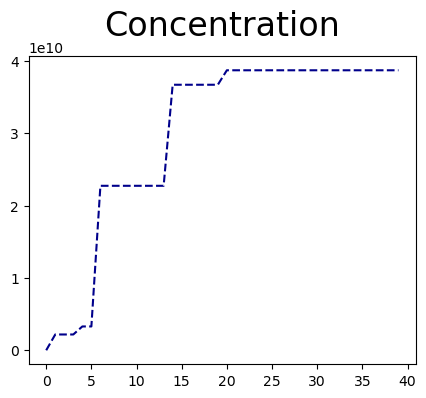

In [3]:
fig1, ax1 = plt.subplots(1, 1, figsize=(5, 4))
col = 'Average_Conc'
ax1.plot(np.arange(len(data_df)), data_df[col].cummax(), linestyle='--', color='darkblue', zorder=1)
ax1.set_xticks(np.arange(0, 41, step=5))
ax1.set_yticks(np.arange(0, 4e10+1, step=10e9))
ax1.set_title("Concentration", fontsize=24, pad=15)
# ax1.set_xticklabels([])
fig1.savefig('Concentration-convergence', dpi=600, bbox_inches='tight')